In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))

[]


In [2]:
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io

In [3]:
#import dataset
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [4]:
print(dataset.target)

[17  0 17 11 ... 13  9  4  9]


In [5]:
# create a dataframe
df = pd.DataFrame({'label':dataset.target,
                   'text':dataset.data})

In [6]:
df.head()

,label,text
0,17,Well i'm not sure about the story nad it did s...
1,0,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,17,Although I realize that principle is not one o...
3,11,Notwithstanding all the legitimate fuss about ...
4,10,"Well, I will have to change the scoring on my ..."


In [7]:
df['label'].unique()

array([17,  0, 11, 10, 15,  4, 13, 12,  1,  6, 19, 16,  8,  7,  2,  5,  3, 14,  9, 18])

In [8]:
df = df[df['label'].isin([1,10])]
df = df.reset_index(drop = True)

In [9]:
df['label'].value_counts()

10    600
1     584
Name: label, dtype: int64

In [10]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

In [13]:
# tokenization 
tokenized_doc = df['text'].apply(lambda x: x.split())

# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) 

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 
df['text'] = detokenized_doc

In [14]:
df['text'].head()

0    Well I change scoring playoff pool Unfortunate...
1    Archive name graphics resources list part Last...
2    And course Mike Ramsey one time captain Buffal...
3    As I promised I would give name Panther presid...
4    GAME S OF ADIRONDACK CDI Adirondack leads seri...
Name: text, dtype: object

In [15]:
from sklearn.model_selection import train_test_split
# split data into training and validation set
df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.3, random_state = 12)

In [16]:
df_trn.shape, df_val.shape

((828, 2), (356, 2))

In [17]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

In [18]:
type(data_lm), type(data_clas)

(fastai.text.data.TextLMDataBunch, fastai.text.data.TextClasDataBunch)

In [19]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


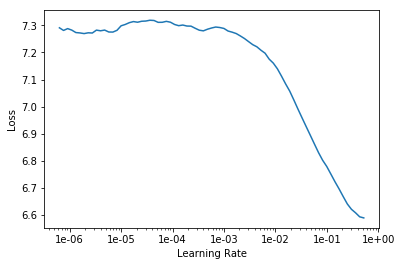

In [21]:
learn.recorder.plot(skip_end=15)

In [22]:
# train the learner object
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.331905,5.292266,0.260987,00:03


In [23]:
learn.save('fit-head')

In [24]:
learn.load('fit-head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (828 items)
x: LMTextList
xxbos xxmaj for xxunk package try xxup wave xxmaj precision xxmaj visuals xxmaj for free package try xxup khoros xxmaj university xxmaj new xxmaj mexico ftp xxunk eece unm edu xxmaj login xxunk ftp valid email address password cd pub khoros release xxmaj that get right place,xxbos i agree xxmaj of cause i try daemon,xxbos xxmaj if life simple xxmaj savard played three last four games still playing like crap xxmaj montreal problems run deeper xxmaj savard xxmaj mouton unfortunately i hope get act together playoffs xxmaj the line game coming pittsburgh said one likely use playoffs xxmaj let hope forget nice weather play hockey,xxbos xxmaj first i enjoyed reading post xxmaj second i disagree xxmaj pen weak spot defense goaltending couple reasons xxmaj barrasso spectacular year slow start consistently sharp xxup gaa leads league wins xxmaj tommy deserves xxmaj vezina xxmaj given lack respect commands though i

In [25]:
learn.unfreeze()

In [26]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.508158,5.071870,0.275248,00:04
1,5.335514,4.860435,0.290526,00:04
2,5.147439,4.727080,0.294320,00:04
3,4.939177,4.615794,0.297123,00:04
4,4.725132,4.546784,0.305531,00:04
5,4.506917,4.517560,0.304588,00:04
6,4.297603,4.506051,0.307217,00:04
7,4.119246,4.508424,0.306275,00:04
8,3.987627,4.508739,0.305779,00:04
9,3.903121,4.510683,0.306200,00:04


In [27]:
learn.save('fine_tuned')
learn.load('fine_tuned');

In [28]:
TEXT = "Although I realize that principle is not"
N_WORDS = 40
N_SENTENCES = 2

In [29]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Although I realize that principle is not related i understand i would try write either program i miss Thanks advance My reason i Thanks xxbos i looking Hartford Whalers But i know picked Hartford Whalers Dave Bruins
Although I realize that principle is not necessarily offensive result center The Halifax Toronto First period i guess Toronto gets another one net win Stanley Cup lost Stanley Cup The last two games i seen stupid


In [30]:
learn.save_encoder('fine_tuned_enc')

In [31]:
#classifier

In [32]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


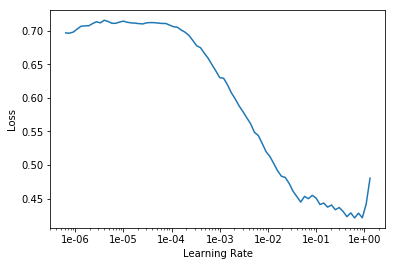

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.388870,0.326786,0.957865,00:08


In [36]:
learn.save('first')
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (828 items)
x: TextList
xxbos xxmaj for xxunk package try xxup wave xxmaj precision xxmaj visuals xxmaj for free package try xxup khoros xxmaj university xxmaj new xxmaj mexico ftp xxunk eece unm edu xxmaj login xxunk ftp valid email address password cd pub khoros release xxmaj that get right place,xxbos i agree xxmaj of cause i try daemon,xxbos xxmaj if life simple xxmaj savard played three last four games still playing like crap xxmaj montreal problems run deeper xxmaj savard xxmaj mouton unfortunately i hope get act together playoffs xxmaj the line game coming pittsburgh said one likely use playoffs xxmaj let hope forget nice weather play hockey,xxbos xxmaj first i enjoyed reading post xxmaj second i disagree xxmaj pen weak spot defense goaltending couple reasons xxmaj barrasso spectacular year slow start consistently sharp xxup gaa leads league wins xxmaj tommy deserves xxmaj vezina xxmaj given lack respect commands though i doub

In [37]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.251575,0.094056,0.966292,00:08


In [38]:
learn.save('second')
learn.load('second')


RNNLearner(data=TextClasDataBunch;

Train: LabelList (828 items)
x: TextList
xxbos xxmaj for xxunk package try xxup wave xxmaj precision xxmaj visuals xxmaj for free package try xxup khoros xxmaj university xxmaj new xxmaj mexico ftp xxunk eece unm edu xxmaj login xxunk ftp valid email address password cd pub khoros release xxmaj that get right place,xxbos i agree xxmaj of cause i try daemon,xxbos xxmaj if life simple xxmaj savard played three last four games still playing like crap xxmaj montreal problems run deeper xxmaj savard xxmaj mouton unfortunately i hope get act together playoffs xxmaj the line game coming pittsburgh said one likely use playoffs xxmaj let hope forget nice weather play hockey,xxbos xxmaj first i enjoyed reading post xxmaj second i disagree xxmaj pen weak spot defense goaltending couple reasons xxmaj barrasso spectacular year slow start consistently sharp xxup gaa leads league wins xxmaj tommy deserves xxmaj vezina xxmaj given lack respect commands though i doub

In [39]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.258656,0.113892,0.957865,00:11


In [40]:
learn.predict("Archive name graphics resources list part")

(Category 1, tensor(0), tensor([0.6411, 0.3589]))

In [41]:
#try freezing another time and check model accuracy